In [22]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset0.csv')

In [23]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
dataset['total_calls']=dataset['total_day_calls']+dataset['total_eve_calls']+dataset['total_night_calls']
dataset['total_minutes']=dataset['total_day_minutes']+dataset['total_eve_minutes']+dataset['total_night_minutes']
dataset['total_charges']=dataset['total_day_charge']+dataset['total_eve_charge']+dataset['total_night_charge']
dataset.drop(['total_day_calls','total_eve_calls','total_night_calls','total_day_minutes','total_eve_minutes','total_night_minutes','total_day_charge','total_eve_charge','total_night_charge'],axis=1,inplace=True)
dataset['churn'] = dataset['churn'].replace({'no':0,'yes':1})
churn_column = dataset['churn']
dataset.drop('churn',axis=1,inplace=True)
dataset['churn'] = churn_column
###THIS SECTION IS DATASET SPECIFIC PROCESSING


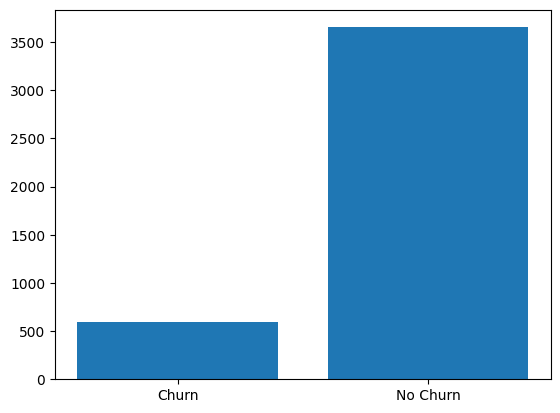

In [24]:
from pre_processor import PreProcessor


label_column = 'churn'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [25]:
binary_encode_columns=['state','area_code','international_plan','voice_mail_plan']
one_hot_encode_columns=[]
ordinal_encode_columns=[]
scaling_columns=['account_length','number_vmail_messages','total_intl_minutes','total_intl_calls',
                     'total_intl_charge','number_customer_service_calls','total_calls','total_minutes','total_charges']


In [26]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

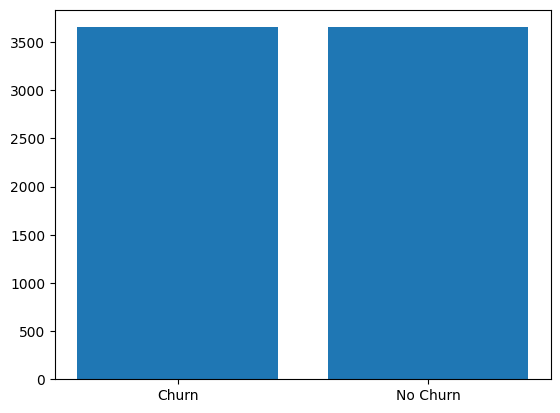

In [27]:
pre_processor.plot_imbalance()

In [28]:
pre_processor.calculate_feature_importance()

,importance
total_charges,0.261463
number_customer_service_calls,0.167444
total_minutes,0.129542
international_plan_1,0.053855
total_intl_minutes,0.053053
international_plan_0,0.052990
total_intl_calls,0.050421
total_intl_charge,0.045450
account_length,0.042186
total_calls,0.041002


In [29]:
pre_processor.remove_features_by_importance(0.01)

In [30]:
pre_processor.split_features_labels()

In [31]:
pre_processor.calculate_feature_importance()

,importance
total_charges,0.271786
number_customer_service_calls,0.178165
total_minutes,0.142213
international_plan_1,0.055292
international_plan_0,0.054393
total_intl_calls,0.053198
total_intl_minutes,0.051778
total_intl_charge,0.050632
account_length,0.044930
total_calls,0.044005


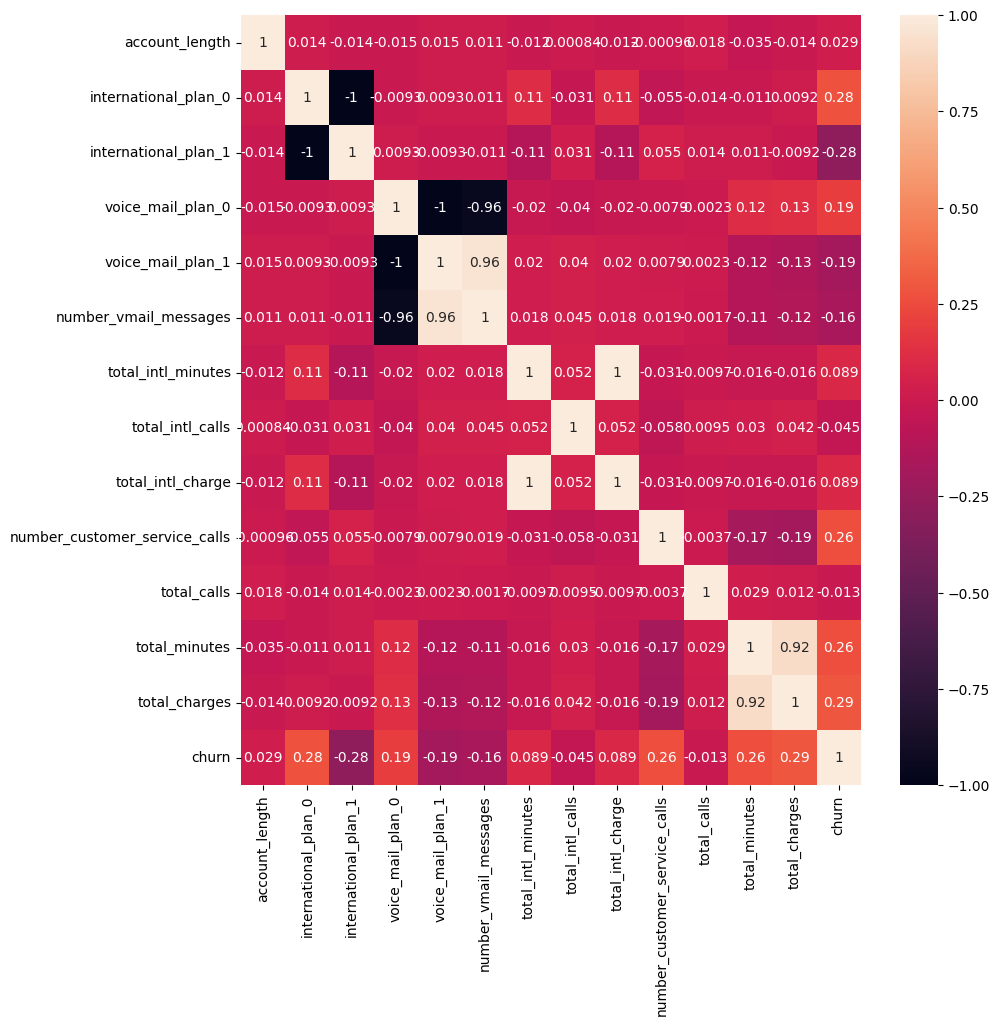

In [32]:
pre_processor.plot_correlation()

In [33]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [34]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=10)

[I 2024-06-11 12:47:43,479] A new study created in memory with name: no-name-312880d4-4a4e-4b70-894a-18cac41bab10
[I 2024-06-11 12:47:44,507] Trial 0 finished with value: 0.8909807586392773 and parameters: {'n_estimators': 104, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.8909807586392773.
[I 2024-06-11 12:47:47,843] Trial 1 finished with value: 0.9377024327079695 and parameters: {'n_estimators': 173, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.9377024327079695.
[I 2024-06-11 12:47:48,159] Trial 2 finished with value: 0.9305141673599963 and parameters: {'n_estimators': 16, 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 19}. Best is trial 1 with value: 0.9377024327079695.
[I 2024-06-11 12:47:48,946] Trial 3 finished with value: 0.970390334790302 and parameters: {'n_estimators': 37, 'max_depth': 29, 'min_samples_split': 18, 'min_samples_leaf': 2}. Best is trial 3 with val

In [35]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       724
         1.0       0.99      0.96      0.97       737

    accuracy                           0.97      1461
   macro avg       0.98      0.97      0.97      1461
weighted avg       0.98      0.97      0.97      1461

Neural Network
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       724
         1.0       0.94      0.85      0.90       737

    accuracy                           0.90      1461
   macro avg       0.90      0.90      0.90      1461
weighted avg       0.90      0.90      0.90      1461

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       724
         1.0       1.00      0.99      0.99       737

    accuracy                           0.99      1461
   macro avg       0.99      0.99      0.99      1461
weighted avg       0.99    

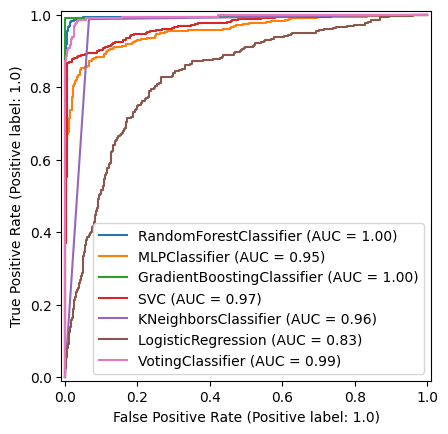

In [36]:
model_select.roc_curve()

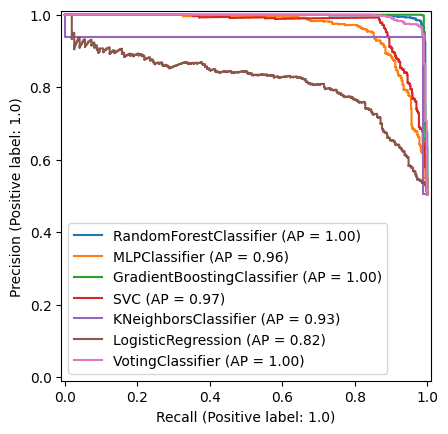

In [37]:
model_select.precision_recall_curve()

In [38]:
model_select.roc_plot.figure.savefig('images/roc_plot0.png')
model_select.pr_plot.figure.savefig('images/pr_plot0.png')

In [39]:
model_select.choose_best_model(model_select.rf_model)

In [40]:
model_select.calculate_max_f1_threshold_for_best_model()

{'max_f1_score': 0.9823609226594301, 'max_f1_threshold': 0.38383838383838387}

In [41]:
model_select.save_best_model()